

- What is a Term Deposit?

* A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
dataset_path = r"C:\Users\user\Downloads\bank (1).csv"
dataset = pd.read_csv(dataset_path)

# UNDERSTANDING THE DATASET AND PREPROCESSING

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
dataset.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
num_duplicates = dataset.duplicated().sum()

In [7]:
num_duplicates

0

In [8]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
dataset.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
dataset.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

- EDA ON THE DATASET 

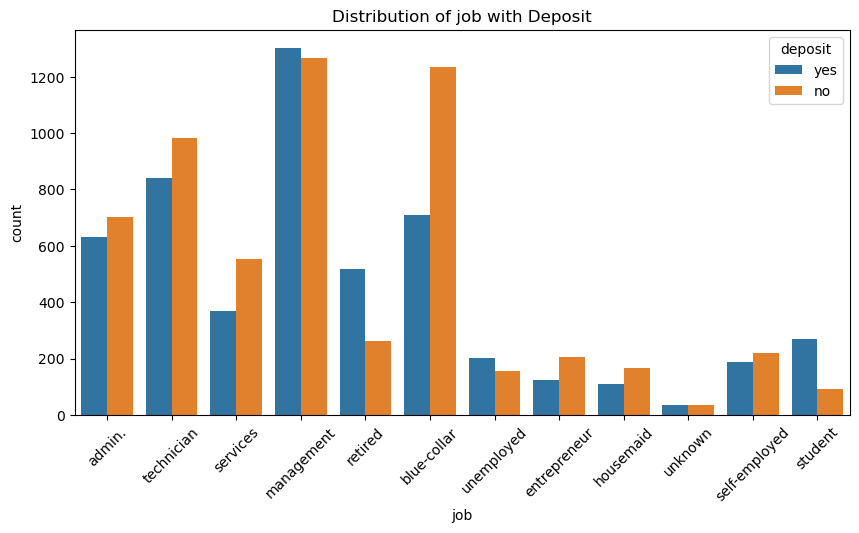

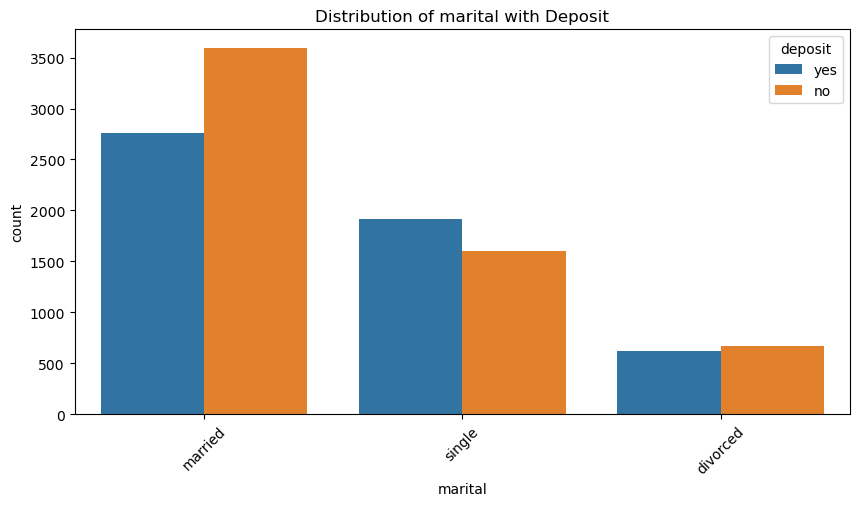

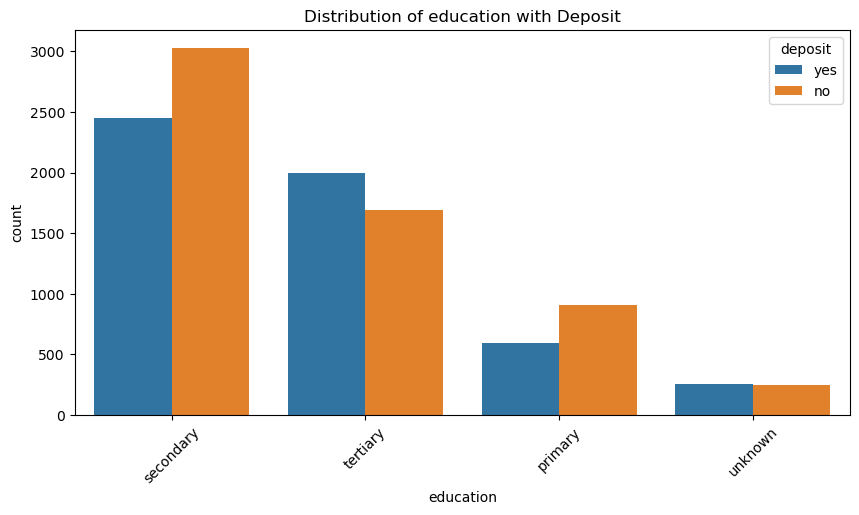

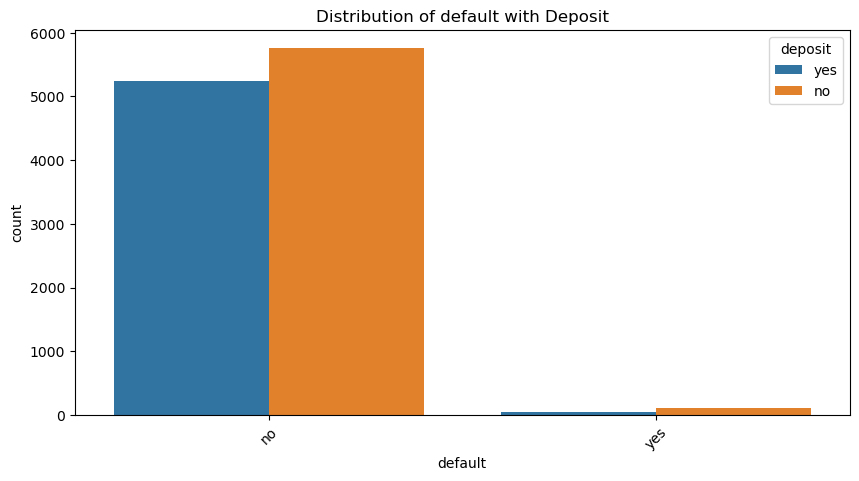

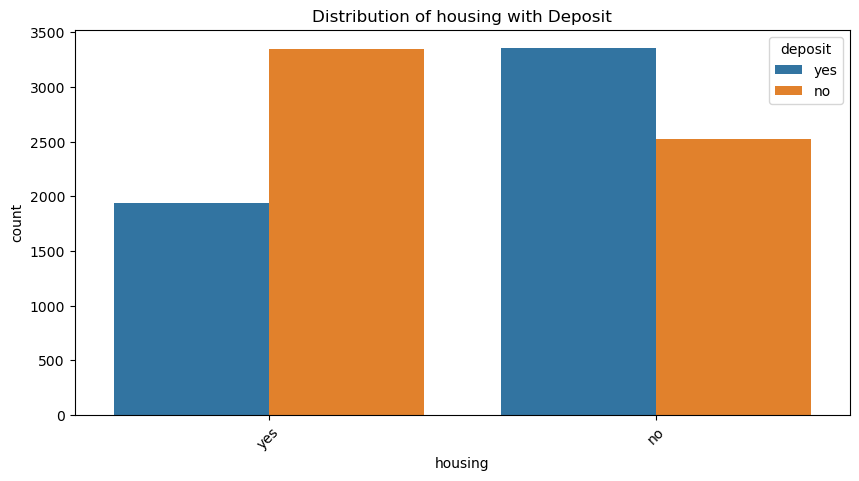

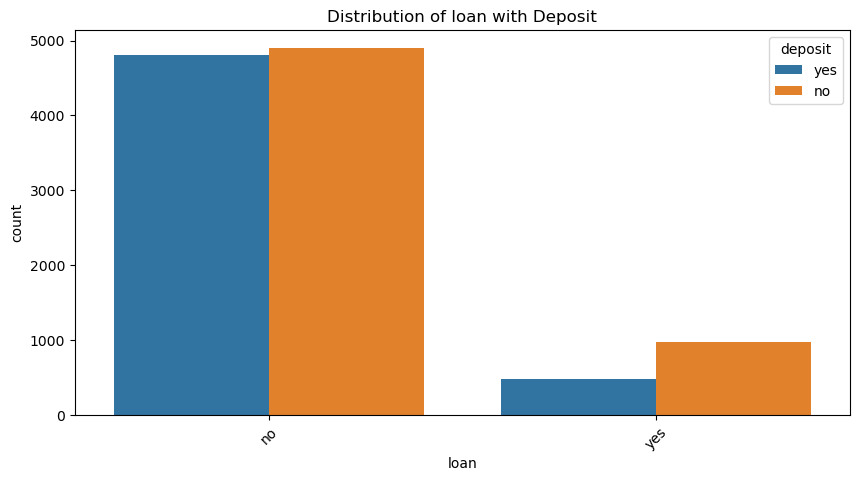

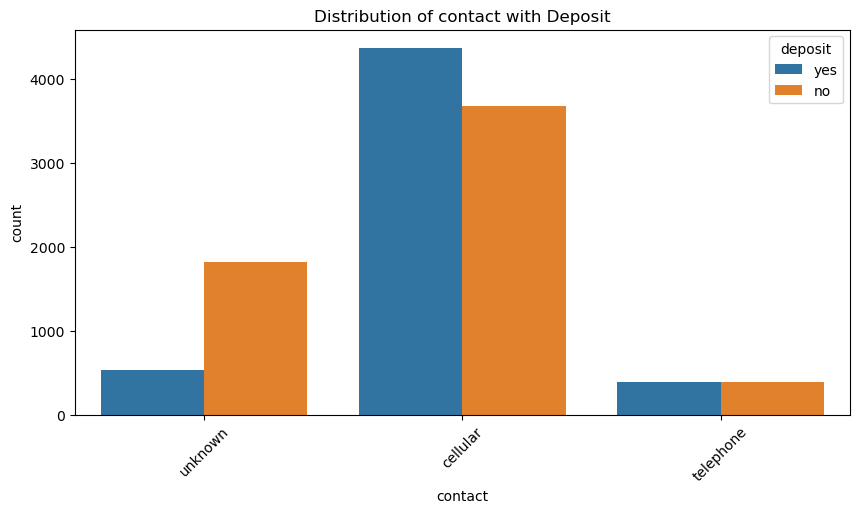

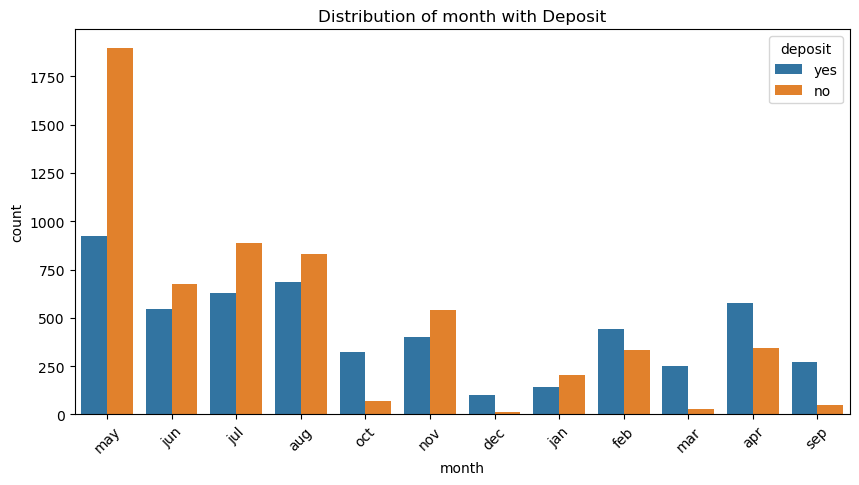

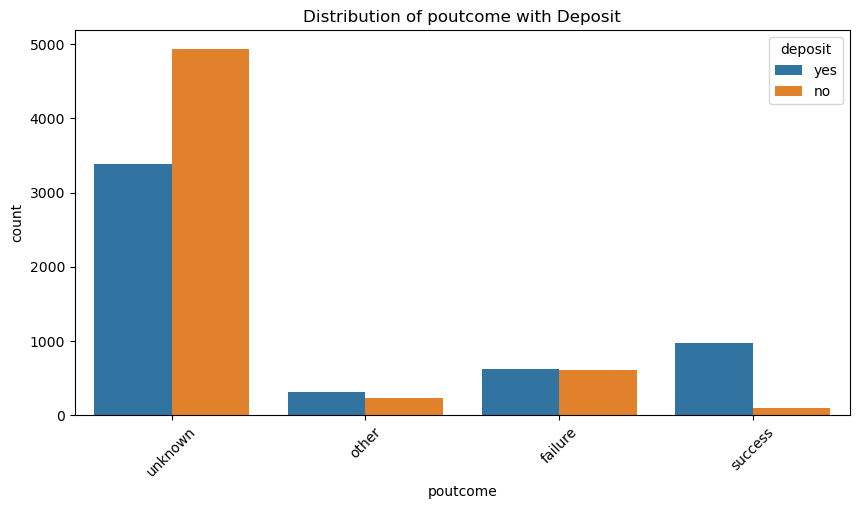

In [16]:
# bivariete  analysis : 
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=dataset, x=column, hue='deposit')
    plt.title(f'Distribution of {column} with Deposit')
    plt.xticks(rotation=45) 
    plt.show()

- Key Findings:
- Job: People in management, retired individuals, and students are more likely to say "yes" to a term deposit, while others are more likely to decline.
- Marital Status: Single individuals show a higher tendency to accept the term deposit.
- Education: People with tertiary education are more inclined to accept the term deposit compared to those with lower education levels.
- Month: Months like April, September, October, March, and December show a higher rate of people accepting term deposits, which might be linked to specific seasonal or financial cycles.
- success full outcomed people are more likey to get 

- PRE - PROCESSING 

In [17]:
dataset.replace({
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'deposit': {'no': 0, 'yes': 1},
    'marital': {'married': 0, 'single': 1, 'divorced': 2},
    'education':{'secondary':2, 'tertiary':3, 'primary':1, 'unknown':0},
    'poutcome':{'unknown':3, 'other':2, 'failure':0, 'success':1}
}, inplace=True)


In [18]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,0,2,0,2343,1,0,unknown,5,may,1042,1,-1,0,3,1
1,56,admin.,0,2,0,45,0,0,unknown,5,may,1467,1,-1,0,3,1
2,41,technician,0,2,0,1270,1,0,unknown,5,may,1389,1,-1,0,3,1
3,55,services,0,2,0,2476,1,0,unknown,5,may,579,1,-1,0,3,1
4,54,admin.,0,3,0,184,0,0,unknown,5,may,673,2,-1,0,3,1


In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [20]:
encoder = LabelEncoder() 

In [21]:
dataset['contact'] = encoder.fit_transform(dataset['contact'])

In [22]:
dataset['month'] = encoder.fit_transform(dataset['month'])

In [24]:
dataset['job'] = encoder.fit_transform(dataset['job'])

In [25]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,2,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,0,2,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,0,2,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,0,2,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,0,3,0,184,0,0,2,5,8,673,2,-1,0,3,1


# MODEL BUILDING 

In [26]:
x = dataset.drop(columns=['deposit'])
y = dataset.deposit

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test  = train_test_split(x,y,test_size=0.33)

In [30]:
len(dataset.columns)

17

In [29]:
from tensorflow import keras

In [40]:
model = keras.Sequential([    
    keras.layers.Dense(16, activation='tanh',input_shape=(16,)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
234/234 [==============================] - 2s 3ms/step - loss: 0.6935 - accuracy: 0.5058
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 0.6784 - accuracy: 0.5897
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 0.6508 - accuracy: 0.6454
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 0.5932 - accuracy: 0.7184
Epoch 5/10
234/234 [==============================] - 1s 3ms/step - loss: 0.5510 - accuracy: 0.7419
Epoch 6/10
234/234 [==============================] - 1s 3ms/step - loss: 0.5340 - accuracy: 0.7533
Epoch 7/10
234/234 [==============================] - 1s 3ms/step - loss: 0.5320 - accuracy: 0.7454
Epoch 8/10
234/234 [==============================] - 1s 3ms/step - loss: 0.5517 - accuracy: 0.7178
Epoch 9/10
234/234 [==============================] - 1s 3ms/step - loss: 0.5379 - accuracy: 0.7422
Epoch 10/10
234/234 [==============================] - 1s 3ms/step - loss: 0.5235 - accuracy: 0.7514

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 453
Trainable params: 453
Non-trainable params: 0
_________________________________________________________________
